In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

In [39]:
X,y=make_classification(n_samples=1000,n_features=5,n_informative=5,n_redundant=0,random_state=3)
X=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
y=pd.DataFrame(y,columns=['target'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [40]:
bag=BaggingClassifier(max_features=2)
bag.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(max_features=2)

In [43]:
accuracy_score(bag.predict(X_test),y_test)

0.8

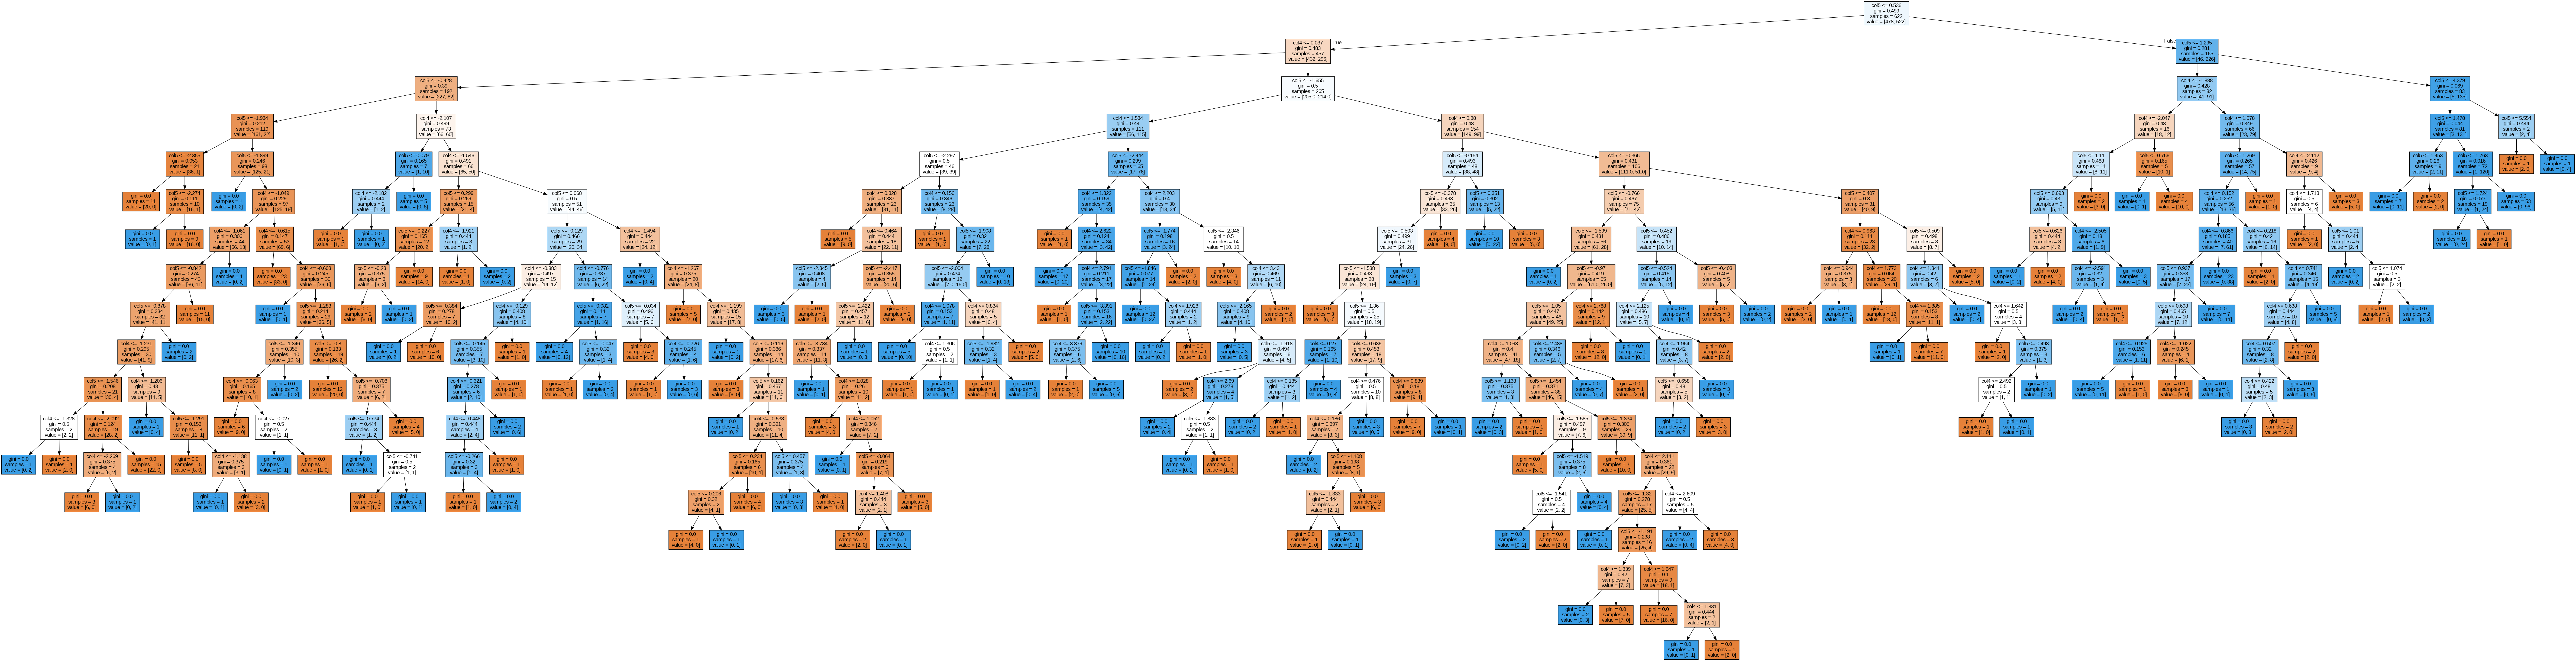

In [36]:
used_features_idx = bag.estimators_features_[0]
used_features = [features[i] for i in used_features_idx]

dot_data = StringIO()
export_graphviz(bag.estimators_[0], out_file=dot_data,
                feature_names=used_features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

we can see only column 5 and 4 are present in every node, indicating tree sampling

In [44]:
rf=RandomForestClassifier(max_features=2)
rf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=2)

In [45]:
accuracy_score(rf.predict(X_test),y_test)

0.92

Random Forest has better accuracy than its bagging on decision trees couterpart

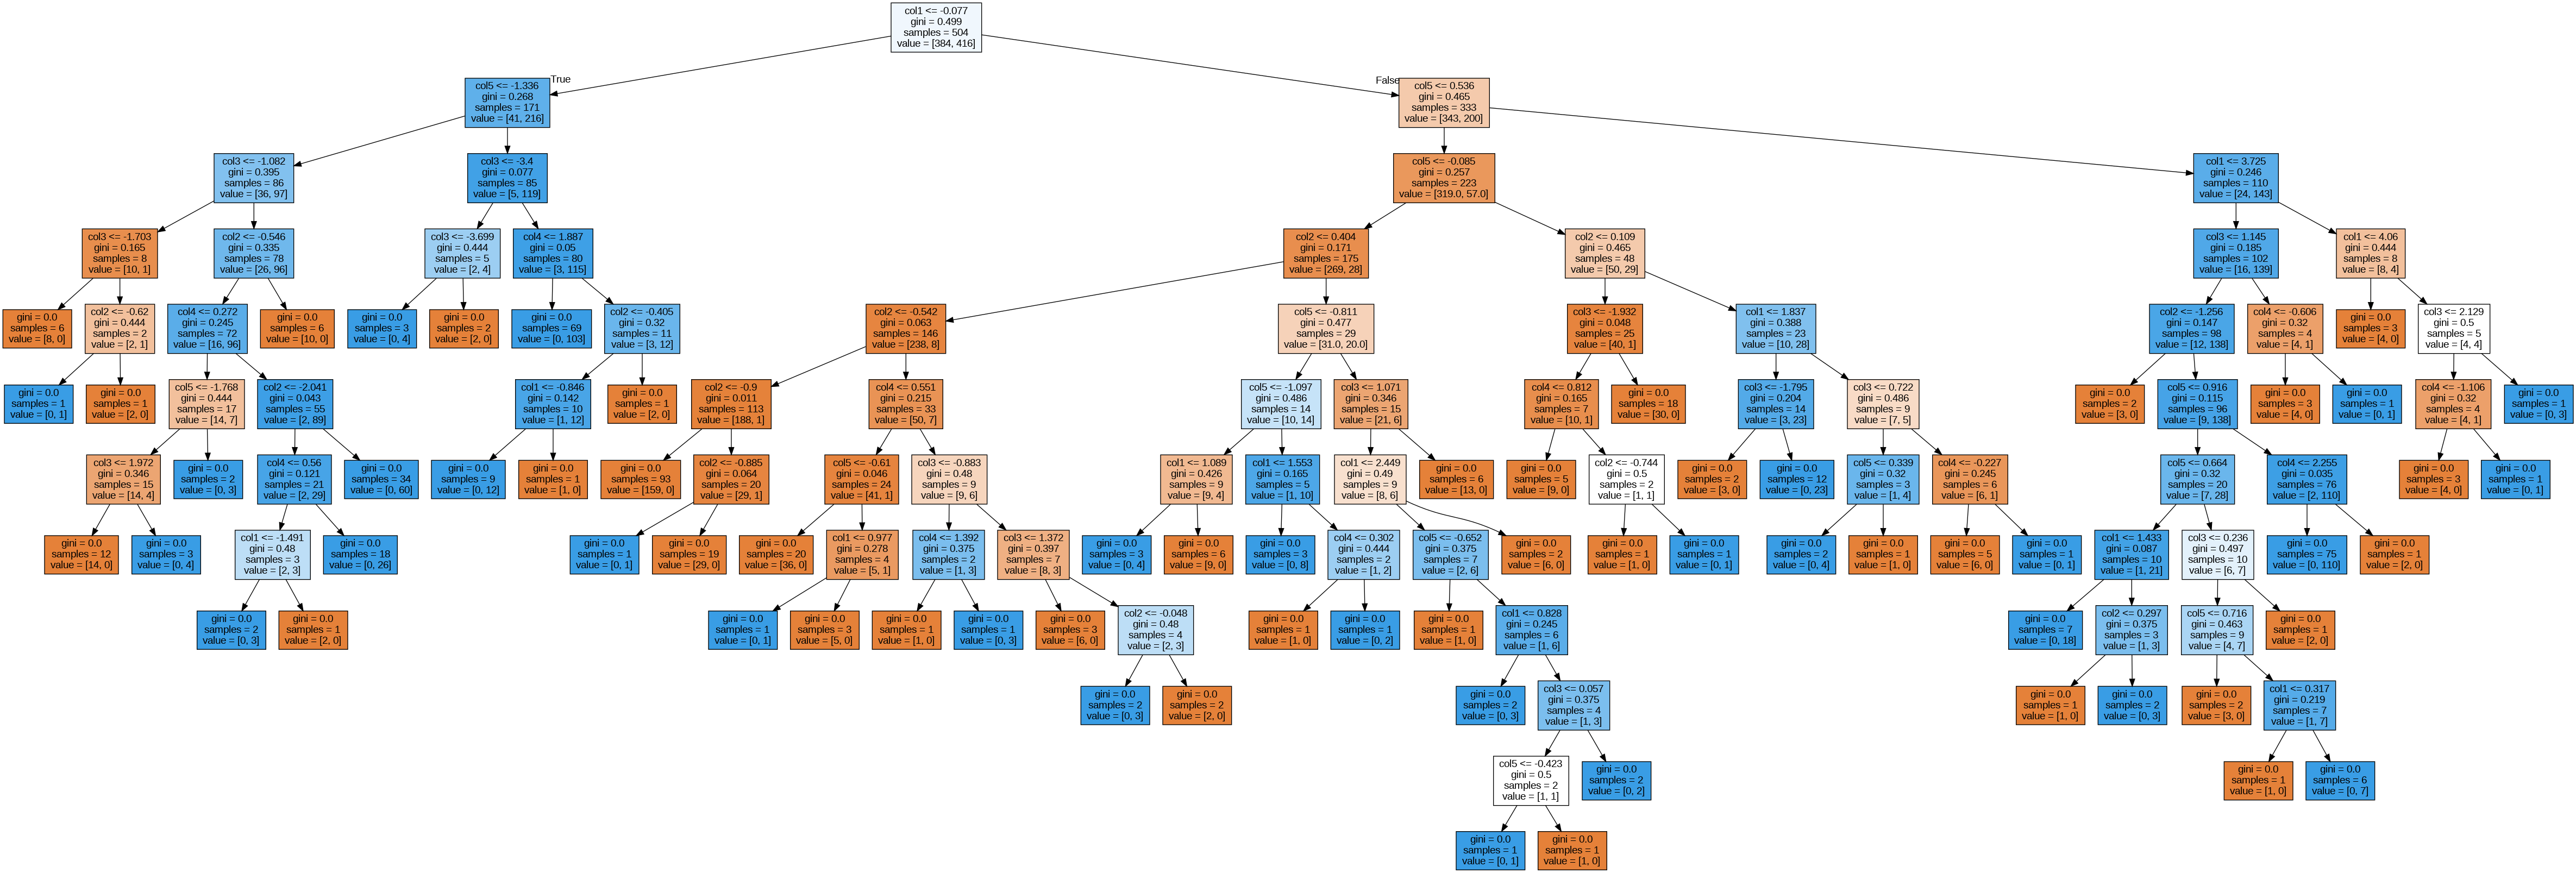

In [48]:
dot_data = StringIO()
export_graphviz(rf.estimators_[0], out_file=dot_data,
                feature_names=rf.feature_names_in_, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

we can each node contains different columns and is not limited to just 2 columns, indicating node sampling